In [36]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
api_key = open("api_stocks.txt","r").read()
api_key

'H19K08UJTQZQWP33'

In [66]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(json.dumps(meta_data,indent='\t'))


{
	"1. Information": "Intraday (1min) open, high, low, close prices and volume",
	"2. Symbol": "MSFT",
	"3. Last Refreshed": "2019-12-13 10:23:00",
	"4. Interval": "1min",
	"5. Output Size": "Full size",
	"6. Time Zone": "US/Eastern"
}


In [67]:
print(data.tail(5))


                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-12-09 09:35:00  151.4600  151.5540  151.4600  151.5540    50126.0
2019-12-09 09:34:00  151.4900  151.4900  151.4900  151.4900    47717.0
2019-12-09 09:33:00  151.6150  151.6150  151.3700  151.5100   101602.0
2019-12-09 09:32:00  151.5450  151.7200  151.5100  151.5825    81074.0
2019-12-09 09:31:00  151.0763  151.7258  151.0552  151.5563   558199.0


In [68]:
print("\nSummary ")
print(data.describe())



Summary 
           1. open      2. high       3. low     4. close      5. volume
count  1611.000000  1611.000000  1611.000000  1611.000000    1611.000000
mean    151.758784   151.796110   151.724070   151.760549   40441.088765
std       0.652537     0.664474     0.645537     0.655030   53660.244740
min     150.360000   150.410000   150.355000   150.355000       0.000000
25%     151.365600   151.400000   151.340000   151.370000   16886.500000
50%     151.624700   151.660000   151.590000   151.630000   26216.000000
75%     151.982500   152.020000   151.950000   151.987100   45434.500000
max     154.245700   154.310000   154.120000   154.247000  783235.000000


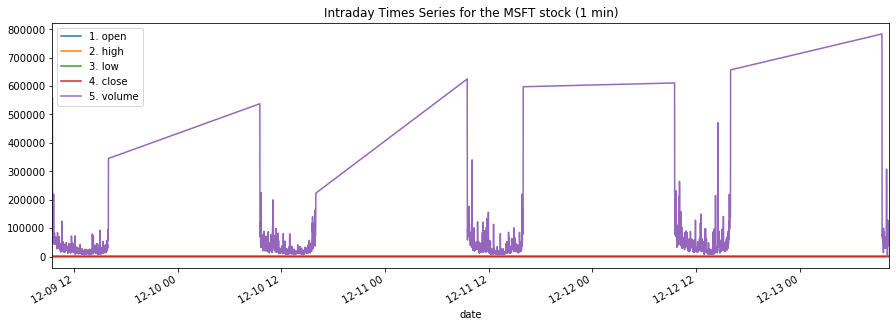

In [75]:
data.plot(figsize=(15,5))
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

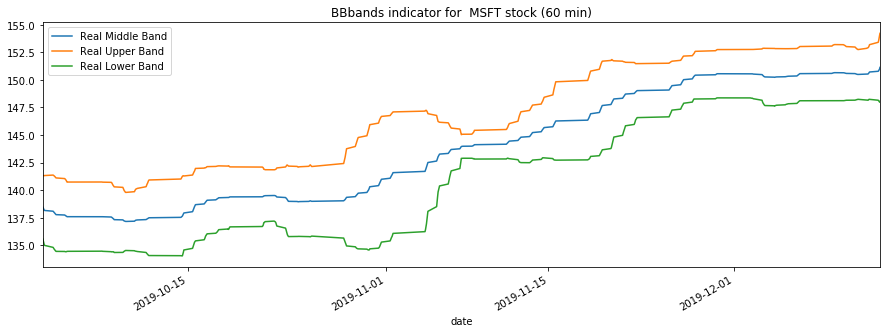

In [78]:
from alpha_vantage.techindicators import TechIndicators
# import matplotlib.pyplot as plt
ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)

data.plot(figsize=(15,5))
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

                     MACD_Signal  MACD_Hist    MACD
date                                               
2019-12-13 13:50:00      -0.0046    -0.0010 -0.0056
2019-12-13 13:49:00      -0.0044    -0.0025 -0.0069
2019-12-13 13:48:00      -0.0038    -0.0021 -0.0058
2019-12-13 13:47:00      -0.0032    -0.0012 -0.0044
2019-12-13 13:46:00      -0.0029    -0.0030 -0.0059
{'1: Symbol': 'MSFT', '2: Indicator': 'Moving Average Convergence/Divergence (MACD)', '3: Last Refreshed': '2019-12-13 13:50:00', '4: Interval': '1min', '5.1: Fast Period': 12, '5.2: Slow Period': 26, '5.3: Signal Period': 9, '6: Series Type': 'close', '7: Time Zone': 'US/Eastern'}


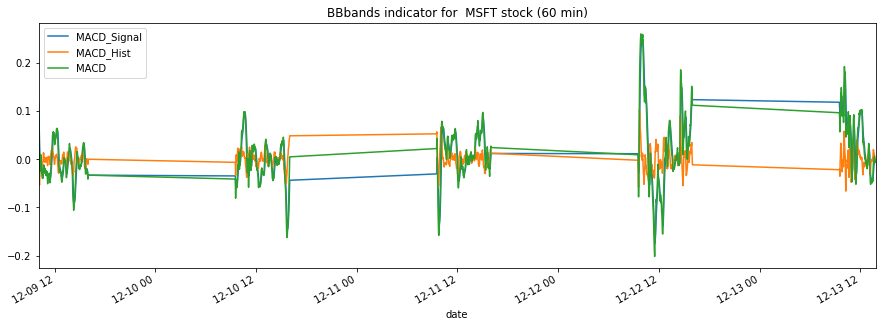

In [96]:
# ❚ Optional: fastperiod

# Positive integers are accepted. By default, fastperiod=12.

# ❚ Optional: slowperiod

# Positive integers are accepted. By default, slowperiod=26.

# ❚ Optional: signalperiod

# Positive integers are accepted. By default, signalperiod=9

data, meta_data = ti.get_macd(symbol='MSFT', interval='1min')
print(data.head(5))
print(meta_data)
data.plot(figsize=(15,5))
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

                      1. open   2. high   3. low  4. close  5. volume
date                                                                 
2019-12-13 14:00:00  154.4900  154.5300  154.480  154.5100    39010.0
2019-12-13 13:59:00  154.4900  154.4900  154.465  154.4876    15079.0
2019-12-13 13:58:00  154.4450  154.4900  154.440  154.4850    41218.0
2019-12-13 13:57:00  154.4594  154.4594  154.440  154.4489    25791.0
2019-12-13 13:56:00  154.4750  154.4896  154.445  154.4524    24086.0


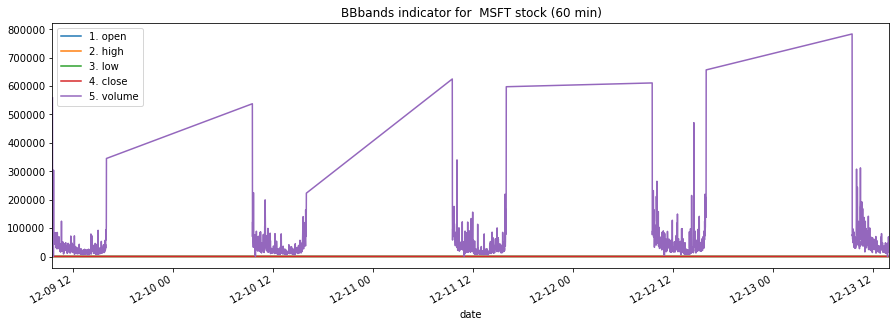

In [101]:
tss = TimeSeries(key=api_key, output_format='pandas')
df, meta_df = tss.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(df.head(5))
df.plot(figsize=(15,5))
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

In [129]:
delta = data[data["MACD"] == data["MACD_Signal"]]
delta

,MACD_Signal,MACD_Hist,MACD
date,,,
2019-12-13 11:32:00,-0.0318,0.0001,-0.0318
2019-12-12 10:21:00,0.1392,-0.0000,0.1392
2019-12-11 14:53:00,0.0557,0.0001,0.0557
2019-12-11 14:27:00,0.0685,0.0001,0.0685
2019-12-10 13:14:00,0.0311,-0.0000,0.0311
2019-12-10 11:40:00,0.0161,0.0000,0.0161
2019-12-10 09:40:00,-0.0512,0.0000,-0.0512
2019-12-09 16:00:00,-0.0331,-0.0001,-0.0331
2019-12-09 12:19:00,0.0600,0.0001,0.0600


In [136]:
dateRange = pd.date_range('12/9/2019', periods=24*6, freq='H')
ndf = df.loc[dateRange].dropna()
# ndf["MACD_Signal"] = delta["MACD_Signal"]
# ndf["MACD_Hist"] = delta["MACD_Hist"]
# ndf["MACD"] = delta["MACD"]
ndf = pd.concat([ndf,data])
ndf

c:\users\xp192\desktop\stocks~1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
c:\users\xp192\desktop\stocks~1\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1. open,2. high,3. low,4. close,5. volume,MACD,MACD_Hist,MACD_Signal
2019-12-09 10:00:00,152.0700,152.0800,151.9600,152.0100,63881.0,NaN,NaN,NaN
2019-12-09 11:00:00,151.7700,151.8100,151.7400,151.7500,22620.0,NaN,NaN,NaN
2019-12-09 12:00:00,151.8158,151.8700,151.8158,151.8587,15978.0,NaN,NaN,NaN
2019-12-09 13:00:00,151.7600,151.8199,151.7600,151.8000,21999.0,NaN,NaN,NaN
2019-12-09 14:00:00,151.7600,151.7700,151.7500,151.7500,8910.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-09 10:08:00,NaN,NaN,NaN,NaN,NaN,0.0224,-0.0495,0.0720
2019-12-09 10:07:00,NaN,NaN,NaN,NaN,NaN,0.0350,-0.0493,0.0844
2019-12-09 10:06:00,NaN,NaN,NaN,NaN,NaN,0.0521,-0.0446,0.0967
2019-12-09 10:05:00,NaN,NaN,NaN,NaN,NaN,0.0640,-0.0438,0.1078


In [158]:
tss = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = tss.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
# print(data)
ti = TechIndicators(key=api_key, output_format='pandas')
d_macd, meta_d_macd = ti.get_macd(symbol='MSFT', interval='1min')
# print(d_macd)

ti = TechIndicators(key=api_key, output_format='pandas')
d_sma, meta_d_sma = ti.get_sma(symbol='MSFT', interval='1min')

ti = TechIndicators(key=api_key, output_format='pandas')
d_ema, meta_d_ema = ti.get_ema(symbol='MSFT', interval='1min')





UsageError: Line magic function `%%time` not found.


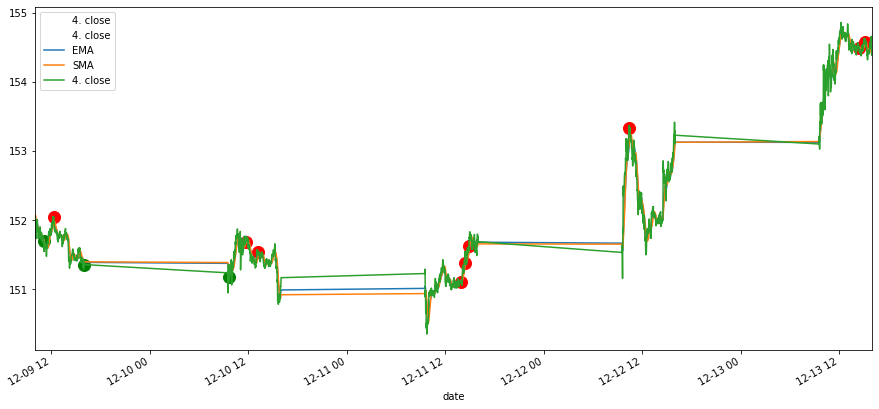

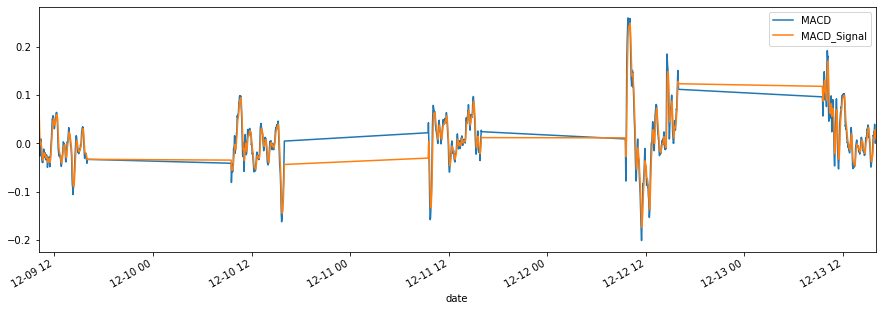

120
90
30
19150


DatetimeIndex(['2019-12-13 16:00:00', '2019-12-13 15:59:00',
               '2019-12-13 15:58:00', '2019-12-13 15:57:00',
               '2019-12-13 15:56:00', '2019-12-13 15:55:00',
               '2019-12-13 15:54:00', '2019-12-13 15:53:00',
               '2019-12-13 15:52:00', '2019-12-13 15:51:00',
               ...
               '2019-12-09 10:13:00', '2019-12-09 10:12:00',
               '2019-12-09 10:11:00', '2019-12-09 10:10:00',
               '2019-12-09 10:09:00', '2019-12-09 10:08:00',
               '2019-12-09 10:07:00', '2019-12-09 10:06:00',
               '2019-12-09 10:05:00', '2019-12-09 10:04:00'],
              dtype='datetime64[ns]', name='date', length=1915, freq=None)

In [247]:
frames = [data, d_macd,d_sma,d_ema]
result = pd.concat(frames, axis=1, join='inner')
# %%time
worker = result[result["MACD"] == result["MACD_Signal"]]

# index_sell = worker[worker["MACD"] >= worker["MACD_Hist"]].index
# index_buy = worker[worker["MACD"] < worker["MACD_Hist"]].index

index_sell = worker[worker["MACD"] > 0].index
index_buy = worker[worker["MACD"] < 0].index


# print(result.loc[index])
sell = result.loc[index_sell]

buy = result.loc[index_buy]

ax = plt.axes()

sell.plot(y=['4. close'],color='red', marker='o',markerfacecolor='red',style='.',ax=ax,markersize=12)
buy.plot(y=['4. close'],color='green', marker='o',markerfacecolor='green',style='.',ax=ax,markersize=12)

result.plot(y=['MACD','MACD_Signal'],figsize=(15,5))
plt.grid()
result.plot(y=['EMA','SMA','4. close'],figsize=(15,7),ax=ax)
plt.grid()
plt.show()


print(worker.size)
print(sell.size)
print(buy.size)
print(result.size)

result.index
# test = result.loc[worker.index]